In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras import models
from keras import layers

In [2]:
# Load the dataset
df = pd.read_csv('data.csv', delimiter=';')

In [4]:
# Display the first few rows to ensure it's loaded correctly
#print(df.head())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   label               120 non-null    int64  
 1   Area(cm^2)          120 non-null    float64
 2   W/L                 120 non-null    float64
 3   Patiole Length(mm)  120 non-null    float64
 4   Number of Pairs     120 non-null    int64  
 5   Ratio               120 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 5.8 KB
None


In [5]:
# Identify the target variable (assuming the column name is 'label')
target = df['label']

In [6]:
# Identify the feature variables (all columns except the target column)
features = df.drop(columns=['label'])

In [10]:
# Verify the shapes to ensure they are correct
print("Target shape:", target.shape)
print("Features shape:", features.shape)

Target shape: (120,)
Features shape: (120, 5)


In [11]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with the updated parameter
encoder = OneHotEncoder(sparse_output=False)


In [13]:
# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

In [14]:
# Transform the testing labels
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

In [15]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(36, activation='tanh', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(18,activation='tanh'))
model.add(layers.Dense(9,activation='tanh'))
model.add(layers.Dense(y_train_encoded.shape[1], activation='softmax'))

C:\Users\VOSTRO\.conda\envs\my_env\Lib\site-packages\keras\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
val_epochs = 200
# Train the model
history = model.fit(x_train, y_train_encoded, epochs=val_epochs, batch_size=1, validation_split=0.2)

Epoch 1/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8864 - loss: 0.2817 - val_accuracy: 0.8000 - val_loss: 0.7933
Epoch 2/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9349 - loss: 0.1618 - val_accuracy: 0.5500 - val_loss: 1.0074
Epoch 3/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9731 - loss: 0.1031 - val_accuracy: 0.8500 - val_loss: 0.4388
Epoch 4/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9539 - loss: 0.0997 - val_accuracy: 0.7000 - val_loss: 0.9567
Epoch 5/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9615 - loss: 0.1868 - val_accuracy: 0.8000 - val_loss: 0.7511
Epoch 6/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9506 - loss: 0.1009 - val_accuracy: 0.8500 - val_loss: 0.4457
Epoch 7/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9540 - loss: 0.0960 - val_accuracy: 0.7500 - val_loss: 0.6565
Epoch 8/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.0833 - val_accuracy: 0.8000 - v

In [17]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9583 - loss: 0.1070
Test accuracy: 0.9583333134651184


In [18]:
# Optional: Make predictions
predictions = model.predict(x_test)
print("Predictions shape:", predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predictions shape: (24, 3)


In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

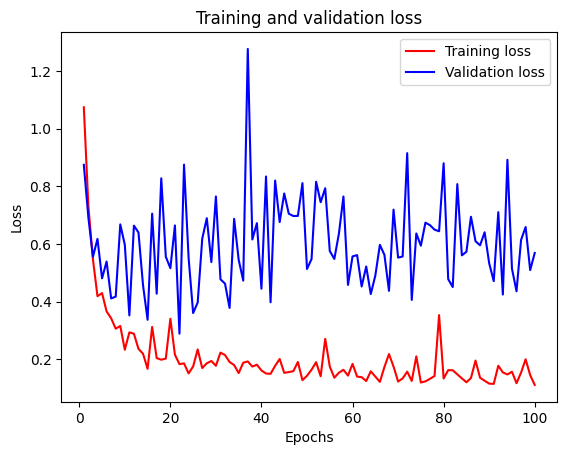

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (val_epochs+1))
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

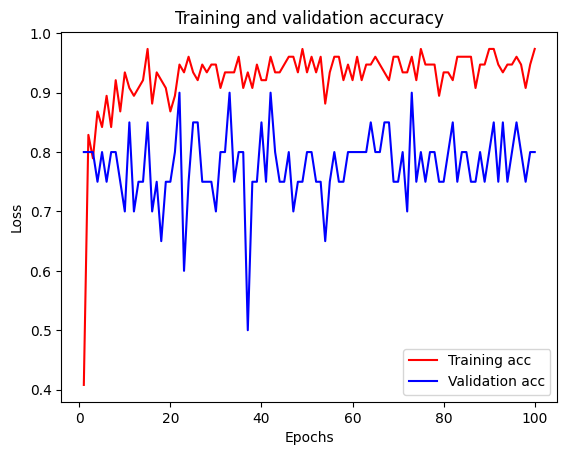

In [21]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()